### Spotify Documentation
- https://spotipy.readthedocs.io/en/2.19.0/#examples
- IDs URIs and URLs

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
SPOTIPY_CLIENT_ID='e18fafeb60a949d2a9b7d1efccabe69a'
SPOTIPY_CLIENT_SECRET='739bbbed49864382a64a64ccd64ecdcc'
#SPOTIPY_REDIRECT_URI='your-app-redirect-url'

In [3]:
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Searching Tracks

In [18]:
results = sp.search(q='track:'+'baby',type='track')

In [19]:
results['tracks']

{'href': 'https://api.spotify.com/v1/search?query=track%3Ababy&type=track&offset=0&limit=10',
 'items': [{'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7jVv8c5Fj3E9VhNjxT4snq'},
      'href': 'https://api.spotify.com/v1/artists/7jVv8c5Fj3E9VhNjxT4snq',
      'id': '7jVv8c5Fj3E9VhNjxT4snq',
      'name': 'Lil Nas X',
      'type': 'artist',
      'uri': 'spotify:artist:7jVv8c5Fj3E9VhNjxT4snq'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/2LIk90788K0zvyj2JJVwkJ'},
      'href': 'https://api.spotify.com/v1/artists/2LIk90788K0zvyj2JJVwkJ',
      'id': '2LIk90788K0zvyj2JJVwkJ',
      'name': 'Jack Harlow',
      'type': 'artist',
      'uri': 'spotify:artist:2LIk90788K0zvyj2JJVwkJ'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
 

In [20]:
print(len(results['tracks']))

7


In [21]:
results['tracks']['items']

[{'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7jVv8c5Fj3E9VhNjxT4snq'},
     'href': 'https://api.spotify.com/v1/artists/7jVv8c5Fj3E9VhNjxT4snq',
     'id': '7jVv8c5Fj3E9VhNjxT4snq',
     'name': 'Lil Nas X',
     'type': 'artist',
     'uri': 'spotify:artist:7jVv8c5Fj3E9VhNjxT4snq'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/2LIk90788K0zvyj2JJVwkJ'},
     'href': 'https://api.spotify.com/v1/artists/2LIk90788K0zvyj2JJVwkJ',
     'id': '2LIk90788K0zvyj2JJVwkJ',
     'name': 'Jack Harlow',
     'type': 'artist',
     'uri': 'spotify:artist:2LIk90788K0zvyj2JJVwkJ'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    '

In [22]:
items_in_tracks = results['tracks']['items']
if len(items_in_tracks) > 0:
    for item in items_in_tracks:
        print(item['name'] + " - By - " + item['artists'][0]['name'])
        print("Track ID: " + item['id'] + " / Artist ID - " + item['artists'][0]['id'])
        print("------")

INDUSTRY BABY (feat. Jack Harlow) - By - Lil Nas X
Track ID: 27NovPIUIRrOZoCHxABJwK / Artist ID - 7jVv8c5Fj3E9VhNjxT4snq
------
Wants and Needs (feat. Lil Baby) - By - Drake
Track ID: 65OVbaJR5O1RmwOQx0875b / Artist ID - 3TVXtAsR1Inumwj472S9r4
------
Drip Too Hard (Lil Baby & Gunna) - By - Lil Baby
Track ID: 78QR3Wp35dqAhFEc2qAGjE / Artist ID - 5f7VJjfbwm532GiveGC0ZK
------
INDUSTRY BABY (feat. Jack Harlow) - By - Lil Nas X
Track ID: 5Z9KJZvQzH6PFmb8SNkxuk / Artist ID - 7jVv8c5Fj3E9VhNjxT4snq
------
Girls Want Girls (with Lil Baby) - By - Drake
Track ID: 37Nqx7iavZpotJSDXZWbJ3 / Artist ID - 3TVXtAsR1Inumwj472S9r4
------
Surround Sound (feat. 21 Savage & Baby Tate) - By - JID
Track ID: 0cp97b37sFNsdIbQH6po3T / Artist ID - 6U3ybJ9UHNKEdsH7ktGBZ7
------
For The Night (feat. Lil Baby & DaBaby) - By - Pop Smoke
Track ID: 0PvFJmanyNQMseIFrU708S / Artist ID - 0eDvMgVFoNV3TpwtrVCoTj
------
EVERY CHANCE I GET (feat. Lil Baby & Lil Durk) - By - DJ Khaled
Track ID: 1EJIcDYXwSqipW5dFe4uJz / Artist

In [23]:
song_id = '37Nqx7iavZpotJSDXZWbJ3'

## Generating token for recommendation

In [10]:
import requests
import base64

In [11]:
def get_token(clientId,clientSecret):
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}
    message = f"{clientId}:{clientSecret}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')
    headers['Authorization'] = "Basic " + base64Message
    data['grant_type'] = "client_credentials"
    r = requests.post(url, headers=headers, data=data)
    token = r.json()['access_token']
    return token

In [12]:
token = get_token(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET)

In [13]:
token

'BQAz_jkRsmK6jwBw8_lVRiq6RpHpxOUxJcuE4i9ruiic1Cz1zpGkkF7RMb3n2wmGtGWHeH4LvpUk8sfFCHo'

## Getting recommendation based on song

In [14]:
def get_track_recommendations(seed_tracks,token):
    limit = 10
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recUrl, headers=headers)
    return res.json()

In [24]:
json_response = get_track_recommendations(song_id,token)

In [25]:
json_response

{'tracks': [{'album': {'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/31W5EY0aAly4Qieq6OFu6I'},
      'href': 'https://api.spotify.com/v1/artists/31W5EY0aAly4Qieq6OFu6I',
      'id': '31W5EY0aAly4Qieq6OFu6I',
      'name': 'A Boogie Wit da Hoodie',
      'type': 'artist',
      'uri': 'spotify:artist:31W5EY0aAly4Qieq6OFu6I'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FJ',
     'FM',
     'FR',
 

In [26]:
uris =[]
for i in json_response['tracks']:
    uris.append(i)
    print(f"\"{i['name']}\" by({i['artists'][0]['name']})")

"24 Hours (feat. Lil Durk) [Bonus]" by(A Boogie Wit da Hoodie)
"Wockesha (with Lil Wayne & Ashanti) - Remix" by(Moneybagg Yo)
"NEVER LEFT" by(Lil Tecca)
"For Tonight" by(Giveon)
"Nail Tech" by(Jack Harlow)
"Solid (feat. Drake)" by(Young Stoner Life)
"Trust Issues" by(Drake)
"Running Wild (Tumblr Girls 2) (feat. Kossisko)" by(G-Eazy)
"Sure Thing" by(Miguel)
"Slide (Remix) (feat. Pop Smoke, A Boogie Wit da Hoodie & Chris Brown) (feat. Pop Smoke)" by(H.E.R.)


In [27]:
recolist = json_response['tracks']
print(len(recolist))

10


In [28]:
recolist[0]

{'album': {'album_type': 'ALBUM',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/31W5EY0aAly4Qieq6OFu6I'},
    'href': 'https://api.spotify.com/v1/artists/31W5EY0aAly4Qieq6OFu6I',
    'id': '31W5EY0aAly4Qieq6OFu6I',
    'name': 'A Boogie Wit da Hoodie',
    'type': 'artist',
    'uri': 'spotify:artist:31W5EY0aAly4Qieq6OFu6I'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR'

In [29]:
import pandas as pd

In [30]:
recommendation_result = pd.DataFrame(recolist)
recommendation_result

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,205702,True,{'isrc': 'USAT22108173'},{'spotify': 'https://open.spotify.com/track/4O...,https://api.spotify.com/v1/tracks/4O7FYAjDATiy...,4O7FYAjDATiyylfIIAuRNE,False,24 Hours (feat. Lil Durk) [Bonus],67,https://p.scdn.co/mp3-preview/3ae34e3529a672be...,7,track,spotify:track:4O7FYAjDATiyylfIIAuRNE
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,217880,True,{'isrc': 'USUM72116456'},{'spotify': 'https://open.spotify.com/track/6Z...,https://api.spotify.com/v1/tracks/6ZIR3HiLbpy5...,6ZIR3HiLbpy5xPAShl2a7u,False,Wockesha (with Lil Wayne & Ashanti) - Remix,67,None,7,track,spotify:track:6ZIR3HiLbpy5xPAShl2a7u
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,168727,True,{'isrc': 'USUM72107053'},{'spotify': 'https://open.spotify.com/track/0s...,https://api.spotify.com/v1/tracks/0soNGRgFn7aq...,0soNGRgFn7aq1T4LXtFDMb,False,NEVER LEFT,72,None,3,track,spotify:track:0soNGRgFn7aq1T4LXtFDMb
3,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,193821,False,{'isrc': 'USSM12106837'},{'spotify': 'https://open.spotify.com/track/61...,https://api.spotify.com/v1/tracks/61Emqg95O9zo...,61Emqg95O9zo1GNOcyxq4Y,False,For Tonight,85,https://p.scdn.co/mp3-preview/6f57cebc9f832e8b...,1,track,spotify:track:61Emqg95O9zo1GNOcyxq4Y
4,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,206385,True,{'isrc': 'USAT22200223'},{'spotify': 'https://open.spotify.com/track/62...,https://api.spotify.com/v1/tracks/62Yo3FDddWY8...,62Yo3FDddWY8ydu6PW2wyz,False,Nail Tech,90,https://p.scdn.co/mp3-preview/eb93fa86ebea9cfb...,1,track,spotify:track:62Yo3FDddWY8ydu6PW2wyz
5,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,215693,True,{'isrc': 'QMCE32100237'},{'spotify': 'https://open.spotify.com/track/6r...,https://api.spotify.com/v1/tracks/6rTInqW3YECM...,6rTInqW3YECMkQsBEHw4sd,False,Solid (feat. Drake),81,https://p.scdn.co/mp3-preview/82b21b6f15a83b0e...,4,track,spotify:track:6rTInqW3YECMkQsBEHw4sd
6,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,281518,True,{'isrc': 'USUG11902746'},{'spotify': 'https://open.spotify.com/track/4W...,https://api.spotify.com/v1/tracks/4Wjhj0WjkyEC...,4Wjhj0WjkyECccfHVIgaTq,False,Trust Issues,76,None,4,track,spotify:track:4Wjhj0WjkyECccfHVIgaTq
7,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,232425,True,{'isrc': 'USRC12102082'},{'spotify': 'https://open.spotify.com/track/3R...,https://api.spotify.com/v1/tracks/3RhaE3JGd1mN...,3RhaE3JGd1mNYbpTOzxSzu,False,Running Wild (Tumblr Girls 2) (feat. Kossisko),56,https://p.scdn.co/mp3-preview/02754ef004dc2cfc...,17,track,spotify:track:3RhaE3JGd1mNYbpTOzxSzu
8,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,195373,False,{'isrc': 'USJI10800160'},{'spotify': 'https://open.spotify.com/track/0J...,https://api.spotify.com/v1/tracks/0JXXNGljqups...,0JXXNGljqupsJaZsgSbMZV,False,Sure Thing,83,https://p.scdn.co/mp3-preview/bd05862b44e5bf41...,1,track,spotify:t

In [31]:
reco_df = recommendation_result[['name', 'explicit', 'duration_ms', 'popularity']]
# 'release_date'

In [32]:
reco_df

,name,explicit,duration_ms,popularity
0,24 Hours (feat. Lil Durk) [Bonus],True,205702,67
1,Wockesha (with Lil Wayne & Ashanti) - Remix,True,217880,67
2,NEVER LEFT,True,168727,72
3,For Tonight,False,193821,85
4,Nail Tech,True,206385,90
5,Solid (feat. Drake),True,215693,81
6,Trust Issues,True,281518,76
7,Running Wild (Tumblr Girls 2) (feat. Kossisko),True,232425,56
8,Sure Thing,False,195373,83
9,"Slide (Remix) (feat. Pop Smoke, A Boogie Wit d...",False,296011,76


In [33]:
reco_df.describe()

,duration_ms,popularity
count,10.00000,10.000000
mean,221353.50000,75.300000
std,39485.28956,10.133004
min,168727.00000,56.000000
25%,197955.25000,68.250000
50%,211039.00000,76.000000
75%,228788.75000,82.500000
max,296011.00000,90.000000


In [34]:
reco_df.dtypes

name           object
explicit         bool
duration_ms     int64
popularity      int64
dtype: object

In [35]:
reco_df['explicit']

0     True
1     True
2     True
3    False
4     True
5     True
6     True
7     True
8    False
9    False
Name: explicit, dtype: bool

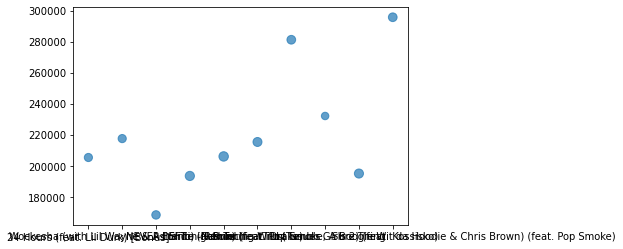

In [37]:
import matplotlib.pyplot as plt
import numpy as np

    
x = reco_df['name']
y = reco_df['duration_ms']
s = reco_df['popularity']
    
plt.scatter(x, y, s, alpha=0.7) # c=reco_df['explicit']
# show the graph
plt.show()

In [38]:
reco_df['duration_min'] = round(reco_df['duration_ms'] / 1000, 0)

/var/folders/j9/zkczhkln1w95vm9cj3p_qzhr0000gp/T/ipykernel_60525/1959306096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df['duration_min'] = round(reco_df['duration_ms'] / 1000, 0)


In [47]:
reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)

/var/folders/j9/zkczhkln1w95vm9cj3p_qzhr0000gp/T/ipykernel_60525/3481783179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)


In [48]:
reco_df

,name,explicit,duration_ms,popularity,duration_min,popularity_range
0,24 Hours (feat. Lil Durk) [Bonus],True,205702,67,206.0,12
1,Wockesha (with Lil Wayne & Ashanti) - Remix,True,217880,67,218.0,12
2,NEVER LEFT,True,168727,72,169.0,17
3,For Tonight,False,193821,85,194.0,30
4,Nail Tech,True,206385,90,206.0,35
5,Solid (feat. Drake),True,215693,81,216.0,26
6,Trust Issues,True,281518,76,282.0,21
7,Running Wild (Tumblr Girls 2) (feat. Kossisko),True,232425,56,232.0,1
8,Sure Thing,False,195373,83,195.0,28
9,"Slide (Remix) (feat. Pop Smoke, A Boogie Wit d...",False,296011,76,296.0,21


In [49]:
# Try:
#reco_df["popularity"] - (reco_df['popularity'].min() - 1)

In [41]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


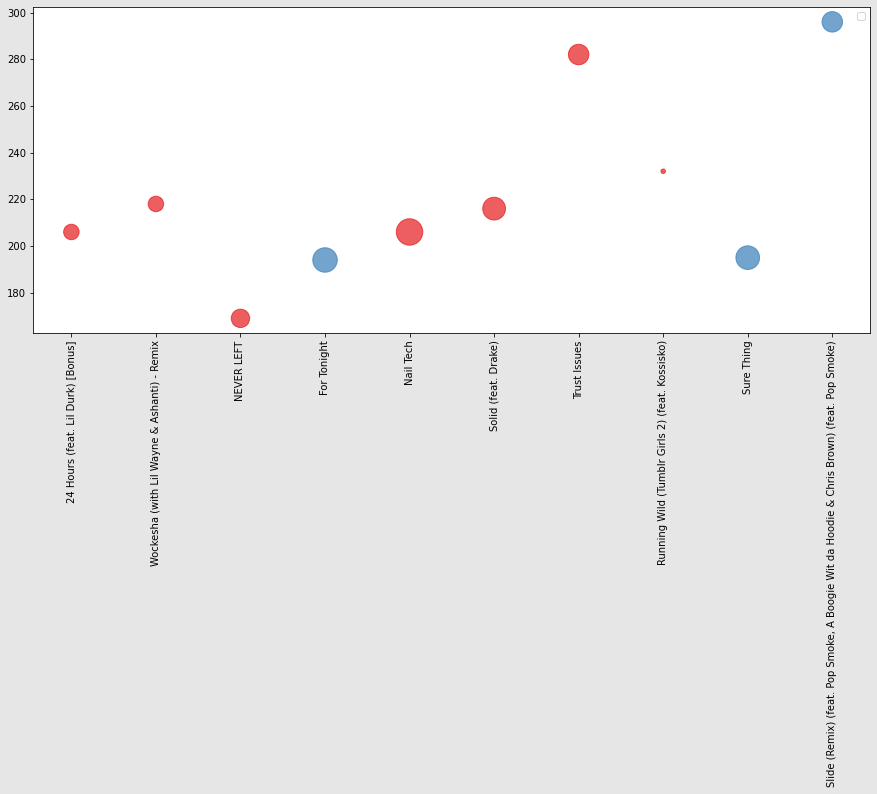

In [50]:
plt.figure(figsize=(15, 6), facecolor=(.9, .9, .9))    

x = reco_df['name']
y = reco_df['duration_min']
s = reco_df['popularity_range']*20
    
color_labels = reco_df['explicit'].unique()
rgb_values = sns.color_palette("Set1", 8)
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(x, y, s, alpha=0.7, c=reco_df['explicit'].map(color_map))
plt.xticks(rotation=90)
plt.legend()
# show the graph
plt.show()